In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data import data_columns
import sys

sys.argv = ["notebook", "--datadir", "/media/EXTHDD/arash/data/solar_flare",
            "--logdir", "log",
            "--resultfilename", "feature_selection",
            "--resultdir", "experiments_plot5",
            "--gpu", "1",
            "--runs", "5",
            "--experiment", "feature_selection",
            "--depth", "2,4,8",
            "--kernelsize", "9,9,9",
            "--nan", "0",
            "--batch", "64",
            "--norm", "scale",
            "--poolingsize", "2",
            "--poolingstrat", "max",
            "--hidden", "128,32",
            "--n", "6500,1000",
            "--valp", "0.5",
            "--importance", "0.5,0.5",
            "--datadrop", "0.0",
            "--layerdrop", "0.3",
            "--seed", "43",
            "--earlystop", "40",
            "--stop", "200",
            "--verbose", "3",
            "--splitreport", "split_best.csv",
            "--modelreport", "model_best.csv",
            "--configreport", "config_best.csv",
            "--aug", "--ndbsr", "--smote", "--cache"]
import utils

args = utils.arg_parse()

In [4]:
saliency = np.load("saliency.npy")
saliency_sum = np.sum(saliency, axis=1)
feature_names = data_columns(args)[1:25]
feature_names, saliency_sum
ordering = sorted(range(len(saliency_sum)), key=lambda i: saliency_sum[i], reverse=True)
print([feature_names[i] for i in ordering])

['TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTUSJZ', 'TOTPOT', 'MEANPOT', 'USFLUX', 'R_VALUE', 'TOTBSQ', 'MEANGBH', 'SHRGT45', 'MEANJZD', 'MEANGBZ', 'EPSY', 'EPSZ', 'TOTFX', 'EPSX', 'MEANGBT', 'MEANALP', 'TOTFZ', 'TOTFY', 'MEANJZH', 'MEANSHR', 'MEANGAM']


In [5]:
data = [
[0.8412, 0.0061],
[0.8390, 0.0043],
[0.8337, 0.0068],
[0.8393, 0.0086],
[0.8426, 0.0093],
[0.8413, 0.0124],
[0.8433, 0.0101],
[0.8549, 0.0089],
[0.8539, 0.0038],
[0.8531, 0.0098],
[0.8490, 0.0105],
[0.8556, 0.0044],
[0.8567, 0.0096],
[0.8467, 0.0144],
[0.8428, 0.0093],
[0.8478, 0.0083],
[0.8486, 0.0164],
[0.8477, 0.0127],
[0.8445, 0.0083],
[0.8521, 0.0096],
[0.8478, 0.0117],
[0.8538, 0.0078],
[0.8570, 0.0042],
[0.8601, 0.0044],
]

In [6]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


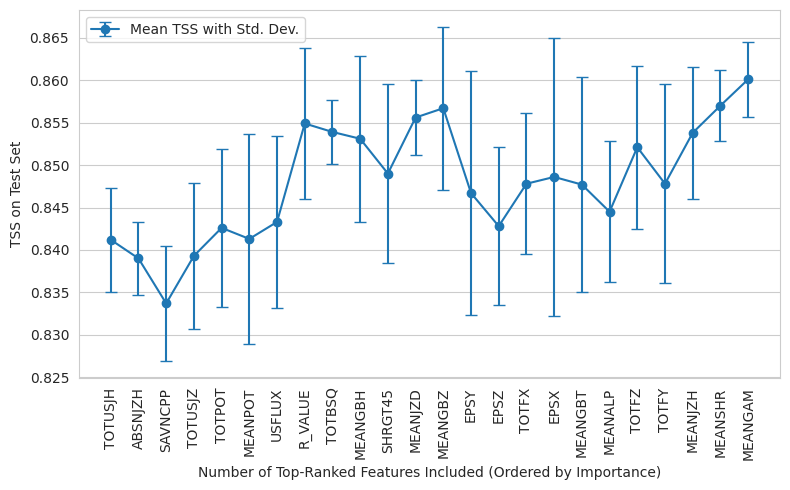

In [24]:
mean_tss_values = [d[0] for d in data]
std_dev_values = [d[1] for d in data]

# Create the x-axis values: number of features from 1 to 24
num_features_range = list(range(1, len(data) + 1))

# Plotting
plt.figure(figsize=(8, 5)) # Adjust figure size for better readability

# Use errorbar to plot line with markers and error bars
plt.errorbar(num_features_range, mean_tss_values, yerr=std_dev_values, fmt='-o', capsize=4, label='Mean TSS with Std. Dev.')
ordered_feature_names = [feature_names[i] for i in ordering]
# Adding labels and title
plt.xlabel("Number of Top-Ranked Features Included (Ordered by Importance)")
plt.ylabel("TSS on Test Set")
# plt.title("Model Performance vs. Number of Features")
plt.grid(axis='x')
plt.xticks(num_features_range, ordered_feature_names, rotation=90)

# Add a legend
plt.legend()

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
# plt.show() # Use this to show the plot interactively

# To save the plot for your thesis (recommended):
plt.savefig('feature_selection_performance.eps', format='eps') # Save as EPS for LaTeX

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


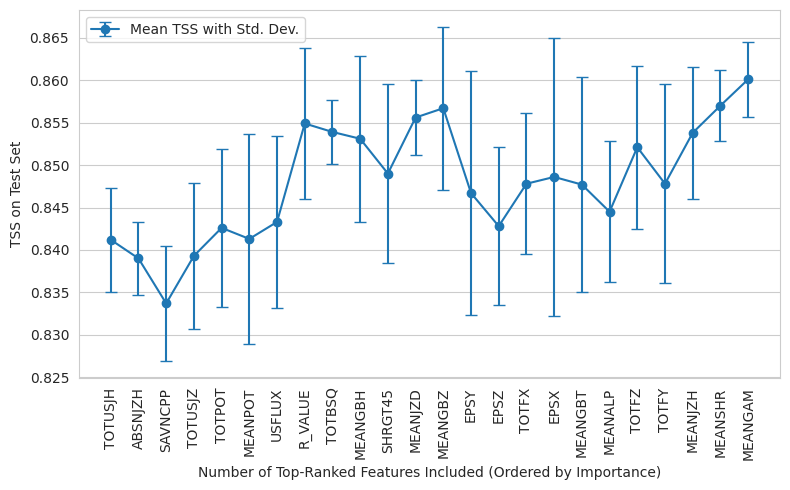

In [23]:

fig, ax = plt.subplots(figsize=(8, 5))  # Use Axes object

# Plot with error bars
ax.errorbar(num_features_range, mean_tss_values, yerr=std_dev_values,
            fmt='-o', capsize=4, label='Mean TSS with Std. Dev.')

# Labels
ax.set_xlabel("Number of Top-Ranked Features Included (Ordered by Importance)")
ax.set_ylabel("TSS on Test Set")

# Horizontal grid only
ax.grid(axis='x')   # ✅ This will now work as expected

# Custom x-ticks
ax.set_xticks(num_features_range)
ax.set_xticklabels(ordered_feature_names, rotation=90)

# Legend
ax.legend()

# Layout and save
plt.tight_layout()
plt.savefig('feature_selection_performance.eps', format='eps')